**Introdução à Modelagem Computacional - MAC024-2020.1-A**

Projeto1 - Questão 1

Equipe F


In [ ]:
import numpy as np
import pylab as pl
import sympy as sp

In [ ]:
def evolui_sistema(p0, k, n=50):
  
  x=[p0]
  for i in range(0,n-1):
    aux=x[i]+k*(1-x[i])
    x.append(aux)

  return x      

Para os cálculos: $k=\alpha$

In [ ]:
p0=[0, 0.0001, 2]
k=[0.1, 0.7, 1.2]

$
\begin{array}{rlc}
p_{n+1} &=&  p_n + \alpha * p_n (1 - p_n)\\
0 &=& p_{n+1} - p_n - \alpha * p_n (1 - p_n)
\end{array}
$

Para encontrar os pontos de equilibrio, fazemos:

$p_{n+1}=p_n=p$

Então:


$
\begin{array}{rlc}
0=p-p-\alpha*p(1-p)\\
0=-\alpha*p(1-p)\\
0=-\alpha*p^2+\alpha*p
\end{array}
$

In [ ]:
P,K= sp.symbols('P K')

In [ ]:
lado_esq= P
lado_dir= P+K*P(1-P)
lado_dir= P+K*P-K*P**2
A=lado_esq-lado_dir
A

K*P**2 - K*P

In [ ]:
pts_equilibrio=sp.solve(A,P)
pts_equilibrio

[0, 1]

**Pontos de Equilibrio:** 

*   $p = 0$ 
*   $p = 1$

Para descrever a estabilidade dos pontos precisamos calcular a $f'(p_n)$

$
\begin{array}{rlc}
f(p_n) &=& p_{n+1}\\
f(p_n) &=& p_n + \alpha * p_n (1 - p_n)
\end{array}
$


Calculando $f'(p)$:


In [ ]:
derivada=sp.diff(lado_dir,P)
derivada

-2*K*P + K + 1


> $f'(p) = -2 * \alpha * p_n + \alpha + 1$

Aplicamos os pontos de equilibrio na derivada para analisarmos a estabilidade.

**Regra Geral:**

Se $|f'(p)| < 1$, então temos um equilibrio estável

Se $|f'(p)| \geqslant 1$, então temos um equilibrio instável


---



Então vamos aplicar os pontos de equilibrio e analisar a estabilidade:

**Para $p=0$:**

> $f'(0) = \alpha + 1$


In [ ]:
estavel1=sp.solve(abs(K+1)<1,K)
instavel1=sp.solve(abs(K+1)>=1,K)
print("Estavel: "+str(estavel1))
print("Instavel: "+str(instavel1))

Estavel: (-2 < K) & (K < 0)
Instavel: ((0 <= K) & (K < oo)) | ((K <= -2) & (-oo < K))


Então concluímos que, para $p=0$:

Temos um equilibrio estável se:  $-2 < \alpha < 0$

Temos um equilibrio instável se: $\alpha \geqslant 0$ ou $\alpha\leqslant-2$ 



---



**Para $p=1$:**


> $f'(1) = -\alpha + 1 $



In [ ]:
estavel2=sp.solve(abs(-K+1)<1,K)
instavel2=sp.solve(abs(-K+1)>=1,K)
print("Estavel: "+str(estavel2))
print("Instável: "+str(instavel2))

Estavel: (0 < K) & (K < 2)
Instável: ((2 <= K) & (K < oo)) | ((K <= 0) & (-oo < K))


Então concluímos que, para $p=1$:

Temos um equilibrio estável se:  $0< \alpha < 2$

Temos um equilibrio instável se: $\alpha \geqslant 2$ ou $\alpha\leqslant0$ 


---



Para finalizar plotamos os gráficos com as condições iniciais dadas:

$p_0=${ 0, 0.0001, 2 }

$\alpha=$ { 0.1, 0.7, 1,2}


---



Coincidentemente, para todos os valores de $\alpha$ = {0.1, 0.7, 1.2}:

Temos equilibrio instável em $p=0$ e equilibrio estável em $p=1$

Para k= 0.1


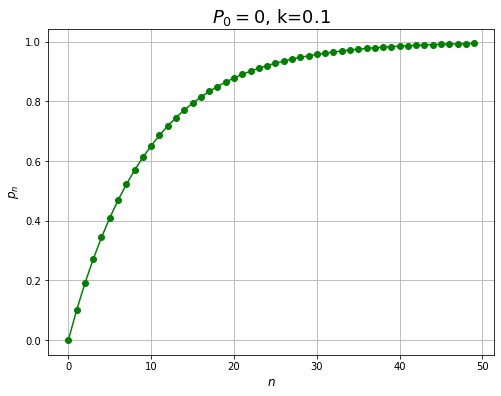

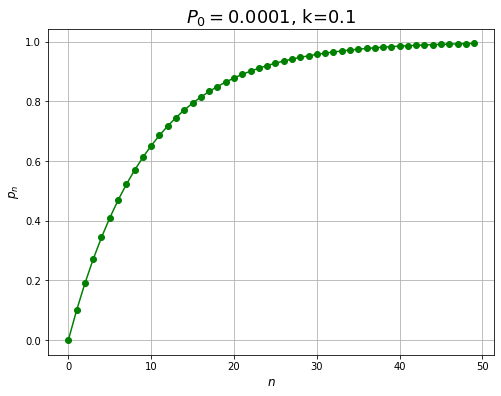

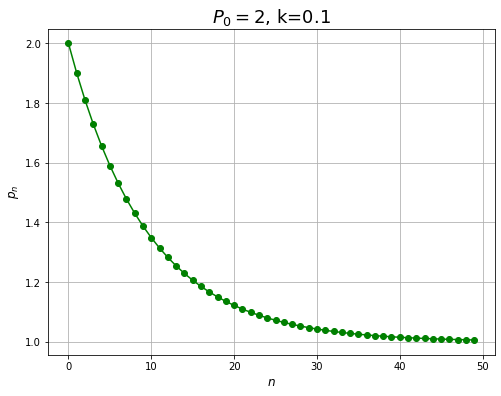

Para k= 0.7


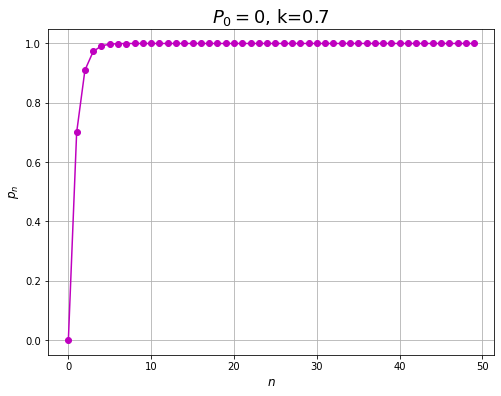

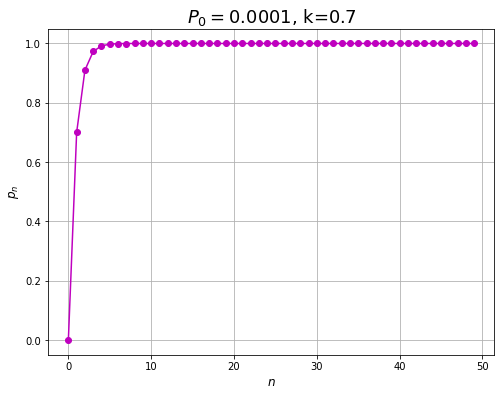

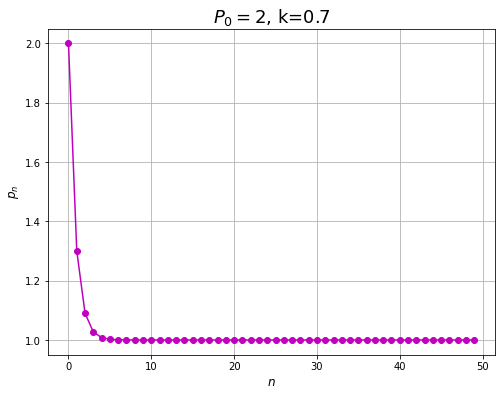

Para k= 1.2


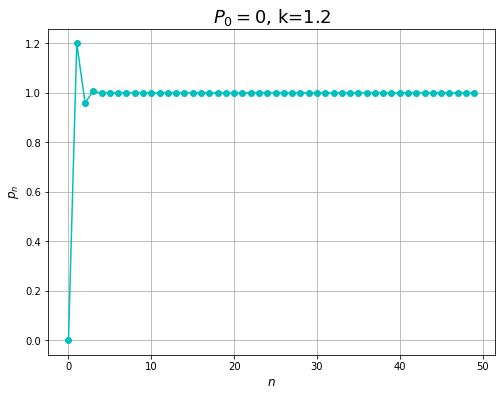

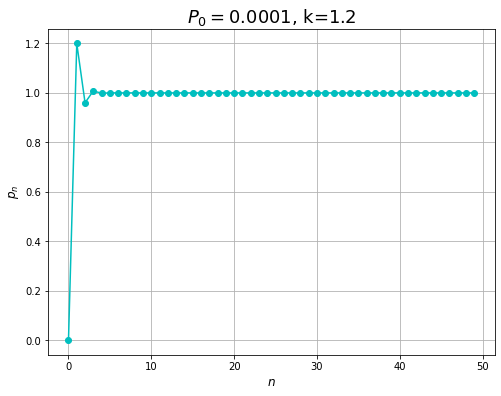

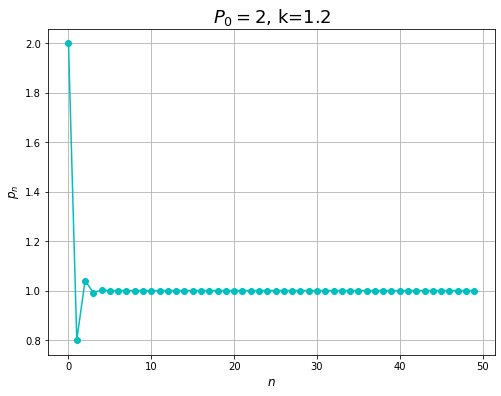

In [ ]:
for i in k:
  print('Para k=',i)
  for j in p0:
    ##print("Valor de alfa",i," Valor de P",j)
    x=evolui_sistema(j,i,50)
    ##print(x)
    pl.figure(figsize=(8,6))
    if(i==k[0]):
      pl.plot(x[:],'go-')
    if(i==k[1]):
      pl.plot(x[:],'mo-')
    if(i==k[2]):
      pl.plot(x[:],'co-')
    pl.grid()
    pl.xlabel('$n$',fontsize=12); pl.ylabel('$p_{n}$',fontsize=12)
    pl.title('$P_0=$'+ str(j) +', k=' + str(i), fontsize=18, color='k')
    pl.show() 